In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('regression_dataset.csv')
data.head()

,cases,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,density_per_km,precipMM
0,2,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,0.505636,0.0
1,0,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,0.505636,0.0
2,1,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,0.505636,0.0
3,0,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,1025,22,10,99,18,2016,4,0.505636,0.0
4,1,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,1025,22,10,99,18,2016,4,0.505636,0.0


In [ ]:
X = data[['maxtempC', 'mintempC', 'windspeedKmph', 'year', 'month', 'density_per_km', 'precipMM', 'cloudcover',
       'humidity','DewPointC', 'latitude', 'longitude','FeelsLikeC', 'winddirDegree', 'sunHour']]
y = data['cases']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor

from matplotlib import pyplot

In [ ]:
# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('cart', DecisionTreeRegressor()))
  level0.append(('lasso', Lasso()))
  level0.append(('ridge', Ridge()))
  # define meta learner model
  level1 = LinearRegression()
  # define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
  return model

In [ ]:
# get a list of models to evaluate
def get_models():
  models = dict()
  models['lin'] = LinearRegression()
  models['lasso'] = Lasso()
  models['ridge'] = Ridge()
  models['cart'] = DecisionTreeRegressor()
  models['stacking'] = get_stacking()
  return models

In [ ]:
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>lin -104.104 (4.982)
>lasso -103.762 (5.004)
>ridge -104.103 (4.982)
>cart -102.383 (6.086)
>stacking -93.860 (5.304)


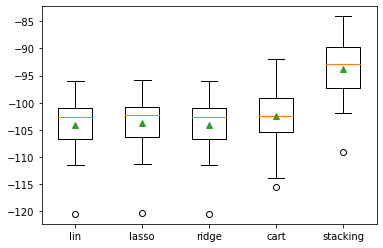

In [ ]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()